In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv',header=None)
df.head(10)


,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [6]:
headers=['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns=headers

In [7]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160
6,46,1,33.440,1,0,4,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,2,29.830,2,0,2,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [12]:
df['age']=df['age'].astype('float')
age_mean=df['age'].astype('float').mean(axis=0)
df['age'].replace(np.nan,age_mean,inplace=True)

/tmp/ipykernel_7494/1957668458.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(np.nan,age_mean,inplace=True)


In [13]:

gender_mode=df['gender'].value_counts().idxmax()
df['gender']=df['gender'].replace(np.nan,gender_mode)

In [14]:

bmi_mean=df['bmi'].mean(axis=0)
df['bmi'].replace(np.nan,bmi_mean,inplace=True)

/tmp/ipykernel_7494/2655180702.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].replace(np.nan,bmi_mean,inplace=True)


In [15]:
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

/tmp/ipykernel_7494/1304141978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   float64
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 151.7+ KB


In [17]:
df[['charges']]=np.round(df[['charges']],2)

In [18]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,19.0,1,27.900,0,1,3,16884.92
1,18.0,2,33.770,1,0,4,1725.55
2,28.0,2,33.000,3,0,4,4449.46
3,33.0,2,22.705,0,0,1,21984.47
4,32.0,2,28.880,0,0,1,3866.86
5,31.0,1,25.740,0,0,4,3756.62
6,46.0,1,33.440,1,0,4,8240.59
7,37.0,1,27.740,3,0,1,7281.51
8,37.0,2,29.830,2,0,2,6406.41
9,60.0,1,25.840,0,0,1,28923.14


(0.0, 54.9885)

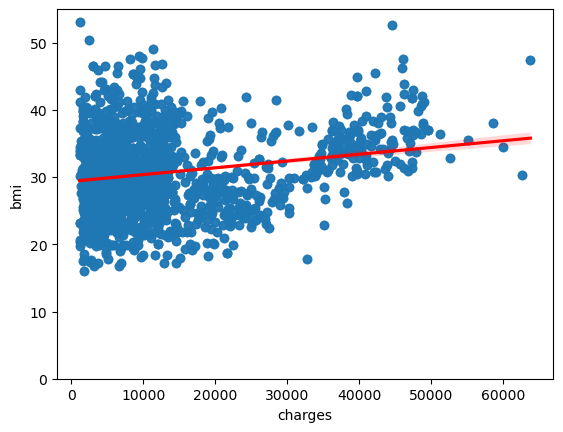

In [24]:
sns.regplot(x=df['charges'],y=df['bmi'],data=df,line_kws={'color':'red'})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

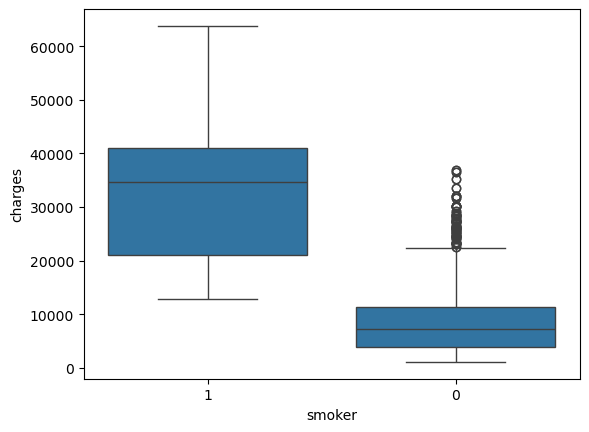

In [27]:
sns.boxplot(x=df['smoker'],y=df['charges'],data=df)

In [28]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,NaN,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,NaN,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,NaN,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,NaN,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,NaN,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,NaN,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [20]:
x=df[['smoker']]
y=df['charges']
lr=LinearRegression()
lr.fit(x,y)
yhat=lr.predict(x)
lr.score(x,y)



0.6221791733924185

In [22]:
z=df[['gender','bmi','no_of_children','smoker','region']]
y=df['charges']
lr.fit(z,y)
lr.score(z,y)

0.6641259526830512

In [23]:
input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [24]:
z=z.astype('float')
pipe.fit(z,y)
yhat_pipe=pipe.predict(z)
yhat_pipe

array([27820.0522948 ,  8021.7780007 ,  8573.19675077, ...,
       24859.97941892,  4576.02806382,  8046.23781338], shape=(2772,))

In [25]:
r2_score(y,yhat_pipe,)

0.7535577355916749

In [26]:
x_data=df.drop('charges',axis=1)
y_data=df['charges']
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20,random_state=1)
print(x_train.shape[0])
print(x_test.shape[0])

2217
555


In [28]:
RR=Ridge(alpha=0.1)
RR.fit(x_train,y_train)
yhat2=RR.predict(x_test)
r2_score(y_test,yhat2)

0.6760802462837339